In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MigPreFuncoes

Imported now


In [8]:
dx=1
nt=120
ntr=80 
dt=0.004

cos(theta2)*dt =  0.0016323282472535678
nt/2 =  0.24


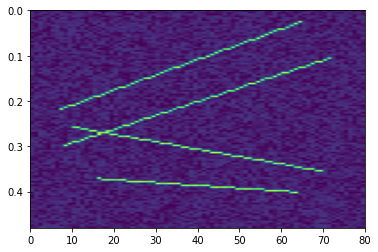

In [15]:
MOD = np.zeros([ntr,nt])

x_ini_1 = int(np.round(1*ntr/5))
x_fim_1 = int(np.round(4*ntr/5))

x_ini_2 = int(np.round(1*ntr/8))
x_fim_2 = int(np.round(7*ntr/8))

x_ini_3 = int(np.round(1*ntr/10))
x_fim_3 = int(np.round(9*ntr/10))

x_ini_4 = int(np.round(1*ntr/11))
x_fim_4 = int(np.round(9*ntr/11))

theta=30
theta2=20
theta3=15
theta4=10
    
for i in range(x_ini_1,x_fim_1):
    z = int(np.round(i*np.cos(theta)) + np.round(3*nt/4))
    MOD[i,z]=1
    
for i in range(x_ini_2,x_fim_2):
    z = int(np.round(i*np.cos(theta2)) + np.round(nt/2))
    MOD[i,z]=1
              
for i in range(x_ini_3,x_fim_3):
    z = int(np.round(i*np.cos(theta3)) + np.round(2*nt/3))
    MOD[i,z]=1
              
for i in range(x_ini_4,x_fim_4):
    z = int(np.round(i*np.cos(theta4)) + np.round(nt/2))
    MOD[i,z]=1
              

nn = np.random.rand(ntr,nt)
MOD = MOD+(nn-0.5)*0.2

print('cos(theta2)*dt = ',np.cos(theta2)*dt)
print('nt/2 = ',nt/2*dt)
plt.imshow(MOD.T, aspect="auto", extent=[0,dx*ntr,nt*dt,0])
plt.show()

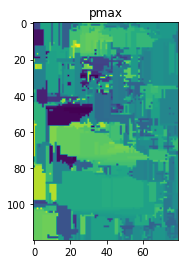

In [11]:
with open("test", "rb") as f:
    m_pmax = np.load(f)
        
plt.imshow(m_pmax)
plt.title("pmax")
plt.show()

Criando listas com os valores de pmax ao longo das 4 retas definidas

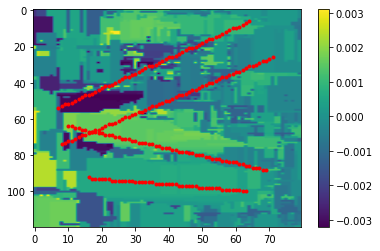

In [16]:
vals_1=[]
vals_2=[]
vals_3=[]
vals_4=[]

for i in range(x_ini_1,x_fim_1):
    z = int(np.round(i*np.cos(theta)) + np.round(3*nt/4))
    plt.imshow(m_pmax, aspect="auto")
    plt.plot(i,z,"r.")
    vals_1.append(m_pmax[z,i])
    
for i in range(x_ini_2,x_fim_2):
    z = int(np.round(i*np.cos(theta2)) + np.round(nt/2))
    plt.imshow(m_pmax, aspect="auto")
    plt.plot(i,z,"r.")
    vals_2.append(m_pmax[z,i])
              
for i in range(x_ini_3,x_fim_3):
    z = int(np.round(i*np.cos(theta3)) + np.round(2*nt/3))
    plt.imshow(m_pmax, aspect="auto")
    plt.plot(i,z,"r.")
    vals_3.append(m_pmax[z,i])
              
for i in range(x_ini_4,x_fim_4):
    z = int(np.round(i*np.cos(theta4)) + np.round(nt/2))
    plt.imshow(m_pmax, aspect="auto")
    plt.plot(i,z,"r.")
    vals_4.append(m_pmax[z,i])
    
plt.colorbar()
plt.show()

In [18]:
import statistics

pmaxS1=0.0006
pmaxS2=0.0016
pmaxS3=-0.003
pmaxS4=-0.0034

vals = [vals_1, vals_2, vals_3, vals_4]
pmaxs = [pmaxS1, pmaxS2, pmaxS3, pmaxS4]

for i,z in enumerate(vals):
    mode = np.round(statistics.mode(z),4)
    mean = np.round(statistics.mean(z),5)
    pmax = np.round(pmaxs[i],4)
    print(f"Reta {str(i)} \nmoda={mode}, média={mean}, pmaxS={pmax}\n")

Reta 0 
moda=0.0006, média=0.00063, pmaxS=0.0006

Reta 1 
moda=0.0016, média=0.00083, pmaxS=0.0016

Reta 2 
moda=0.0016, média=-4e-05, pmaxS=-0.003

Reta 3 
moda=-0.0031, média=-0.00096, pmaxS=-0.0034



***********

A partir daqui, não sei se está certo... Talvez eu tenha que investigar com mais calma a unidade do m_pmax. Os valores de theta estão meio estranhos

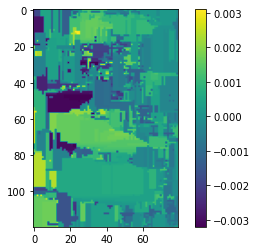

In [19]:
m_theta = np.arctan(m_pmax)
plt.imshow(m_theta)
plt.colorbar()
plt.show()

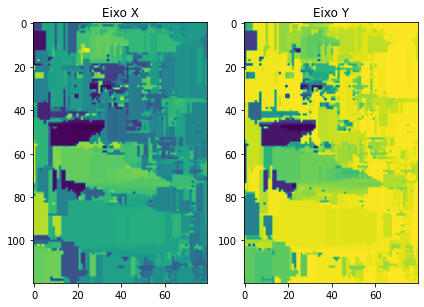

In [21]:
X = np.sin(m_theta)
Y = np.cos(m_theta)

fig, axs = plt.subplots(1, 2, figsize=(6,6))

axs[0].imshow(X)
axs[0].set_title("Eixo X")

axs[1].imshow(Y)
axs[1].set_title("Eixo Y")

plt.tight_layout()

*********

Criando a tabela do tempo de trânsito.

Considerei o dx do nosso modelo como 1 metro. 

Como dt=0.004 s e nt=120, o tempo máximo é 0.48 s

velocidade do modelo c = 120/0.48 = 250 m/s

(120, 80)


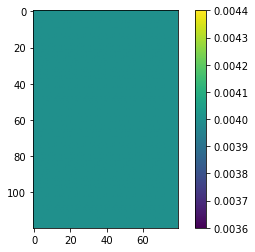

In [26]:
c = 250

SW=np.ones([nt,ntr])*1/c
print(SW.shape)
plt.imshow(SW)
plt.colorbar()
plt.show()

In [27]:
#TT=MigPreFuncoes.raymodel3(SW,dx,ntr,"Data/raiosSlantStack.npy")

In [28]:
with open('Data/raiosSlantStack.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

TTh.shape=(80, 120, 80)


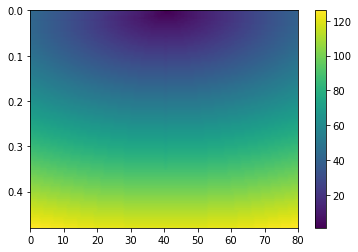

TSX.shape=(120, 80)


In [29]:
TSX = (TTh[40,:,:]/dt+1).astype(int)  # Traveltime  (indexes)
plt.imshow(TSX,extent=[0, ntr*dx, nt*dt, 0], aspect='auto')
plt.colorbar()
plt.show()

print(f"TSX.shape={TSX.shape}")

In [30]:
timer=np.round(TTh/dt)+1

igx = 40
isx = 40

gH = np.gradient(timer, axis=2) #gradiente horizontal
gV = np.gradient(timer, axis=1) #gradiente vertical

prV = gV[igx,:,:] 
prH = gH[igx,:,:] 

psV = gV[isx,:,:] 
psH = gH[isx,:,:] 

pH = psH + prH
pV = psV + prV

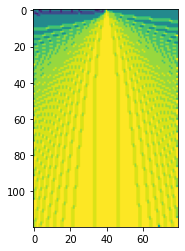

In [31]:
norma = np.sqrt(pH**2 + pV**2)
w = (pH/norma * X) + (pV/norma * Y)

plt.imshow(w)
plt.show()

### Algo parece estar errado!